In [24]:
import read_data as rd
import reprocessing as re_prcs
import numpy as np
import matplotlib.pyplot as plt
og_signals = rd.read_record("/home/phuc/university_of_science/ECG_Transformer/ECG-TRANSFORMER/data/mit-bih-arrhythmia-database-1.0.0/100")
annotation = rd.read_annotate("/home/phuc/university_of_science/ECG_Transformer/ECG-TRANSFORMER/data/mit-bih-arrhythmia-database-1.0.0/100")
#print(signals, annotation)

In [16]:

annote_normal_beats = re_prcs.beat_annotations(annotation)
annote_supra_ven = re_prcs.supra_ven_beat_annotations(annotation)
print(annote_normal_beats)
print(annote_supra_ven)

(array([    77,    370,    662, ..., 649484, 649734, 649991]), array(['N', 'N', 'N', ..., 'N', 'N', 'N'], dtype='<U1'))
(array([  2044,  66792,  74986,  99579, 128085, 170719, 279576, 305709,
       307745, 312825, 317785, 319223, 346804, 351481, 377081, 397335,
       421994, 422818, 433841, 436149, 442623, 444705, 454651, 458168,
       496712, 520982, 562812, 566259, 567379, 574429, 579448, 593068,
       629171]), array(['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A'], dtype='<U1'))


In [20]:
signals = np.array(og_signals).flatten() #flattening original signal to one-dimensional array
print(signals)

[-0.145 -0.145 -0.145 ... -0.675 -0.765 -1.28 ]


[-0.16756799 -0.16756758 -0.16756634 ... -0.52743165 -0.59770604
 -1.        ]
0.9352
-0.9743


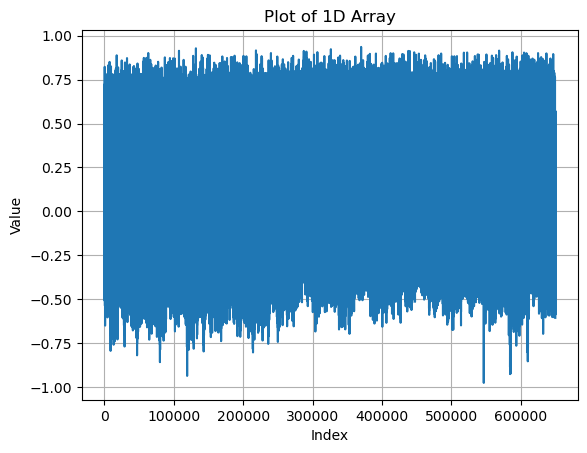

In [31]:
#normalizing signal
norm_signals = re_prcs.norm(signals, window_len=500 )

print(norm_signals)
norm_signals = re_prcs.smooth(norm_signals,11)
norm_signals = [round(num, 4) for num in norm_signals]
print(max(norm_signals))
print(min(norm_signals))
x_values = np.arange(len(norm_signals))

# Plot the array
plt.plot(x_values, norm_signals)
plt.title('Plot of 1D Array')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [40]:
#splitting the data into chunks/tokens
split_idx = rd.spliting_index(300,1,len(norm_signals), 100, 0)
print(split_idx)

[[     0      1      2 ...    297    298    299]
 [   200    201    202 ...    497    498    499]
 [   400    401    402 ...    697    698    699]
 ...
 [649200 649201 649202 ... 649497 649498 649499]
 [649400 649401 649402 ... 649697 649698 649699]
 [649600 649601 649602 ... 649897 649898 649899]]
